# GHZ state 

$|GHZ\rangle = \frac{1}{\sqrt{2}}(|000\dots 0\rangle + |111\dots 1\rangle)$

$|GHZ\rangle = \frac{1}{\sqrt{2}}\sum_{i=0}^1|i\rangle^{\otimes n}$

# Imports

In [1]:
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator

from ghz_state_generator import create_ghz_state_quantum_circuit

# Settings

In [2]:
num_qubits = 20
shots = 1024
backend = AerSimulator()

qubits = QuantumRegister(size=num_qubits, name="qubits")
bits = ClassicalRegister(size=num_qubits, name="bits")

# 1) Standard GHZ state quantum circuit

In [3]:
qc = QuantumCircuit(qubits)

qc.h(qubit=qubits[0])
for i in range(1, num_qubits):
    qc.cx(control_qubit=qubits[0], target_qubit=qubits[i])

In [4]:
qc.depth()

20

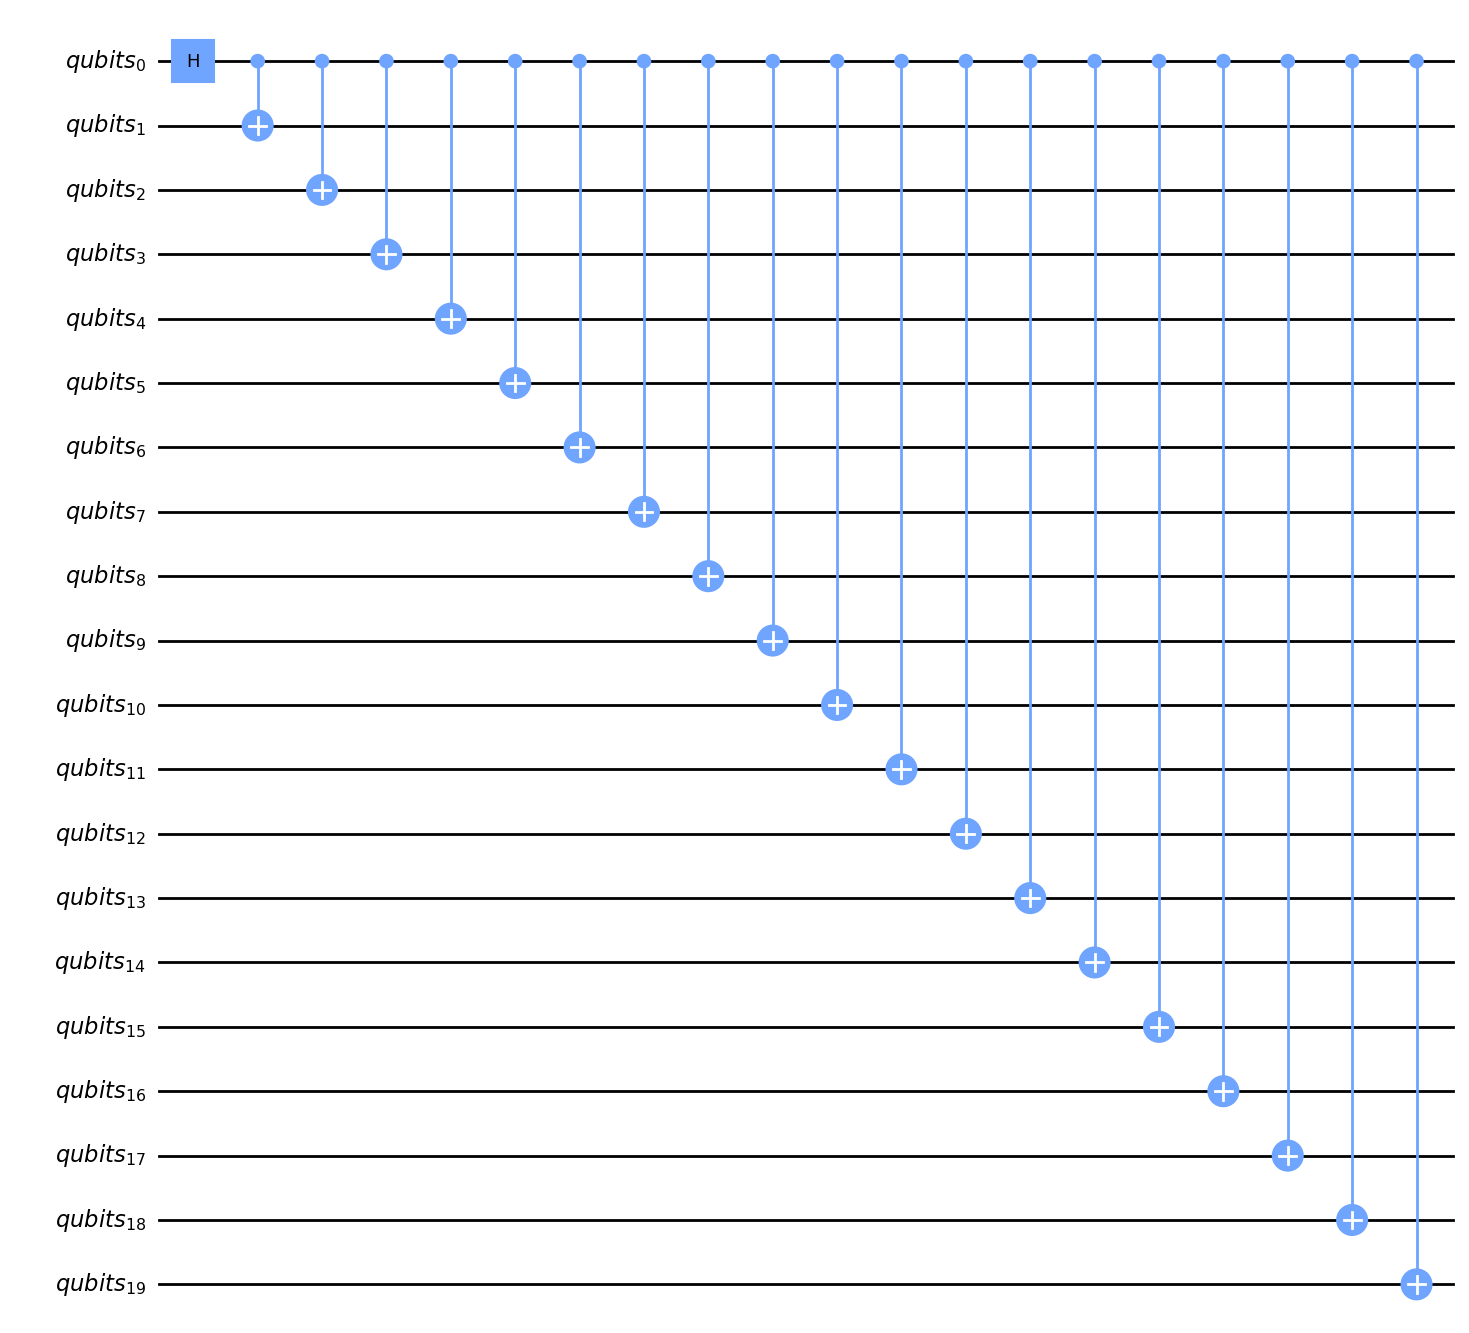

In [5]:
qc.draw(output="mpl")

In [6]:
qc = QuantumCircuit(qubits, bits)

qc.h(qubit=qubits[0])
for i in range(1, num_qubits):
    qc.cx(control_qubit=qubits[0], target_qubit=qubits[i])
qc.measure(qubit=qubits, cbit=bits)
counts = backend.run(qc, shots=shots).result().get_counts()
print(counts)

{'11111111111111111111': 520, '00000000000000000000': 504}


# 2) Low depth GHZ state quantum circuit

In [7]:
qc = create_ghz_state_quantum_circuit(num_qubits=num_qubits)

In [8]:
qc.depth()

7

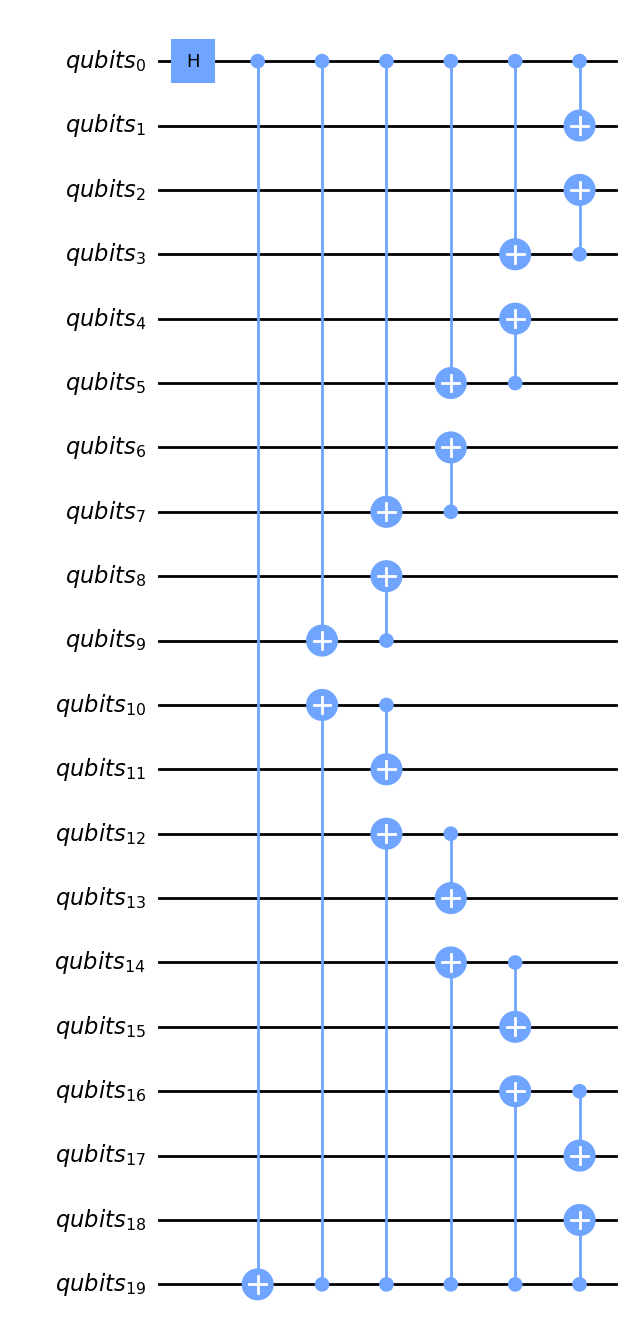

In [9]:
qc.draw(output="mpl")

In [10]:
qc = create_ghz_state_quantum_circuit(num_qubits=num_qubits, add_measurements=True)
counts = backend.run(qc, shots=shots).result().get_counts()
print(counts)

{'00000000000000000000': 524, '11111111111111111111': 500}
